<Figure size 1500x600 with 0 Axes>

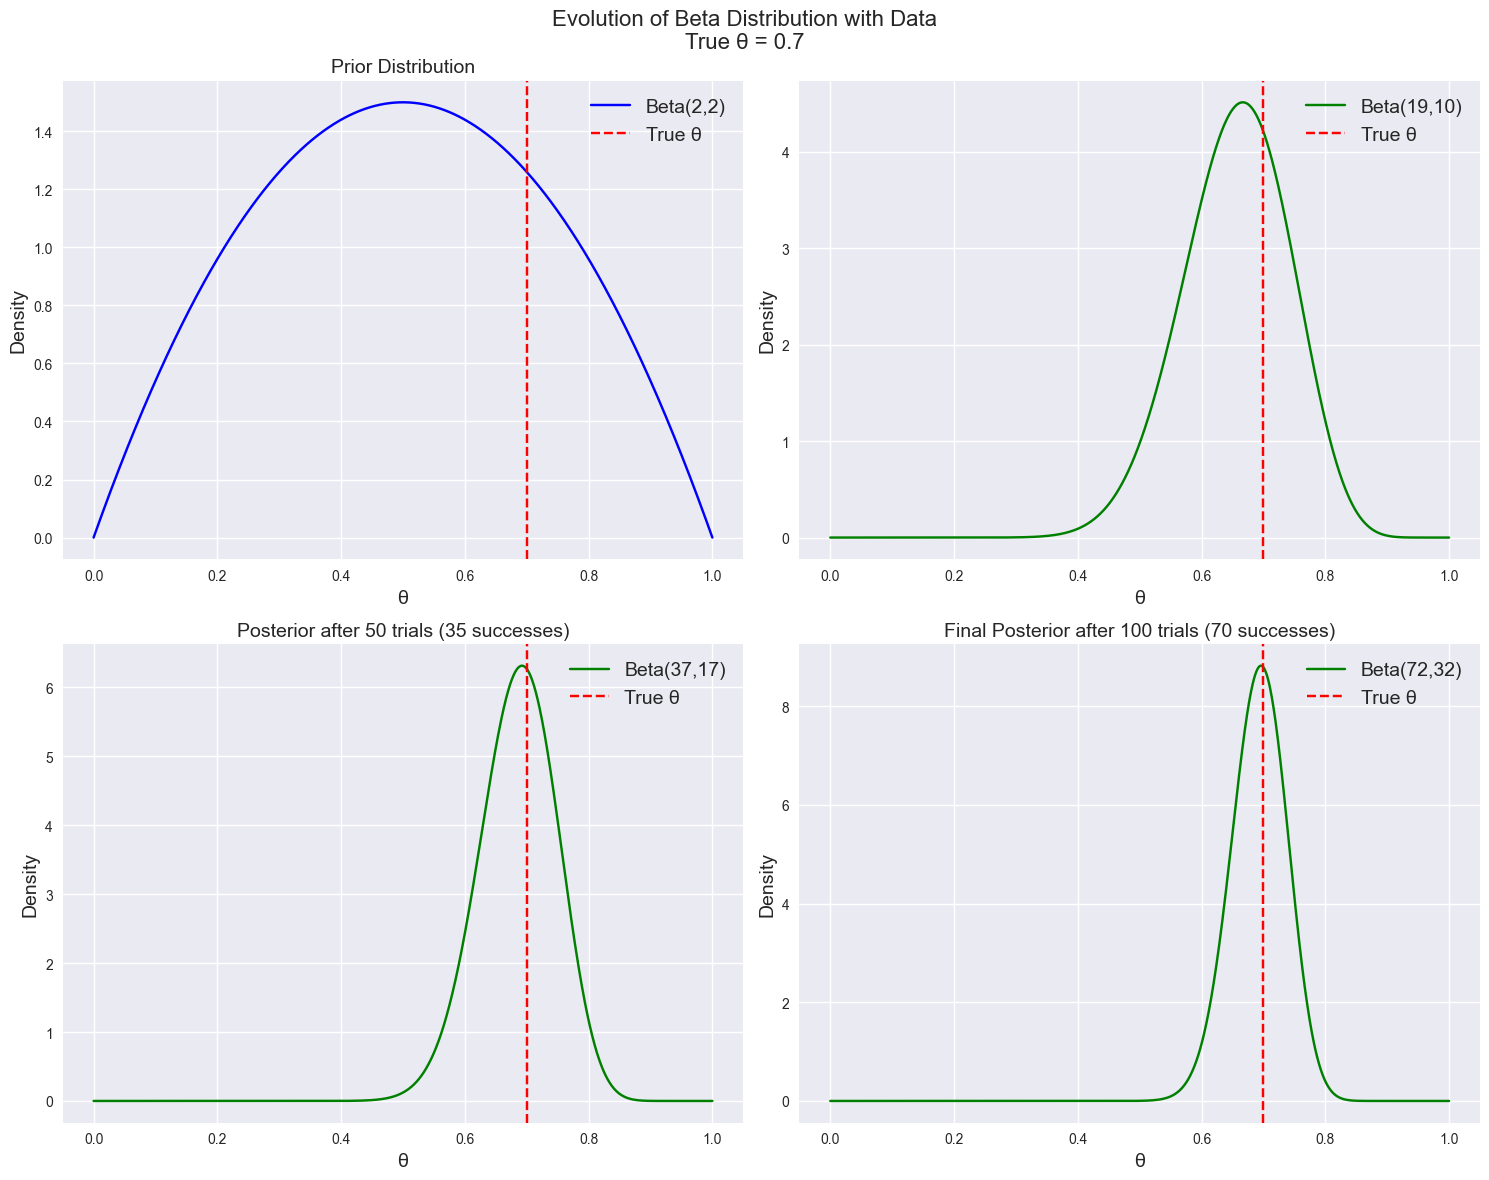

<Figure size 1500x600 with 0 Axes>

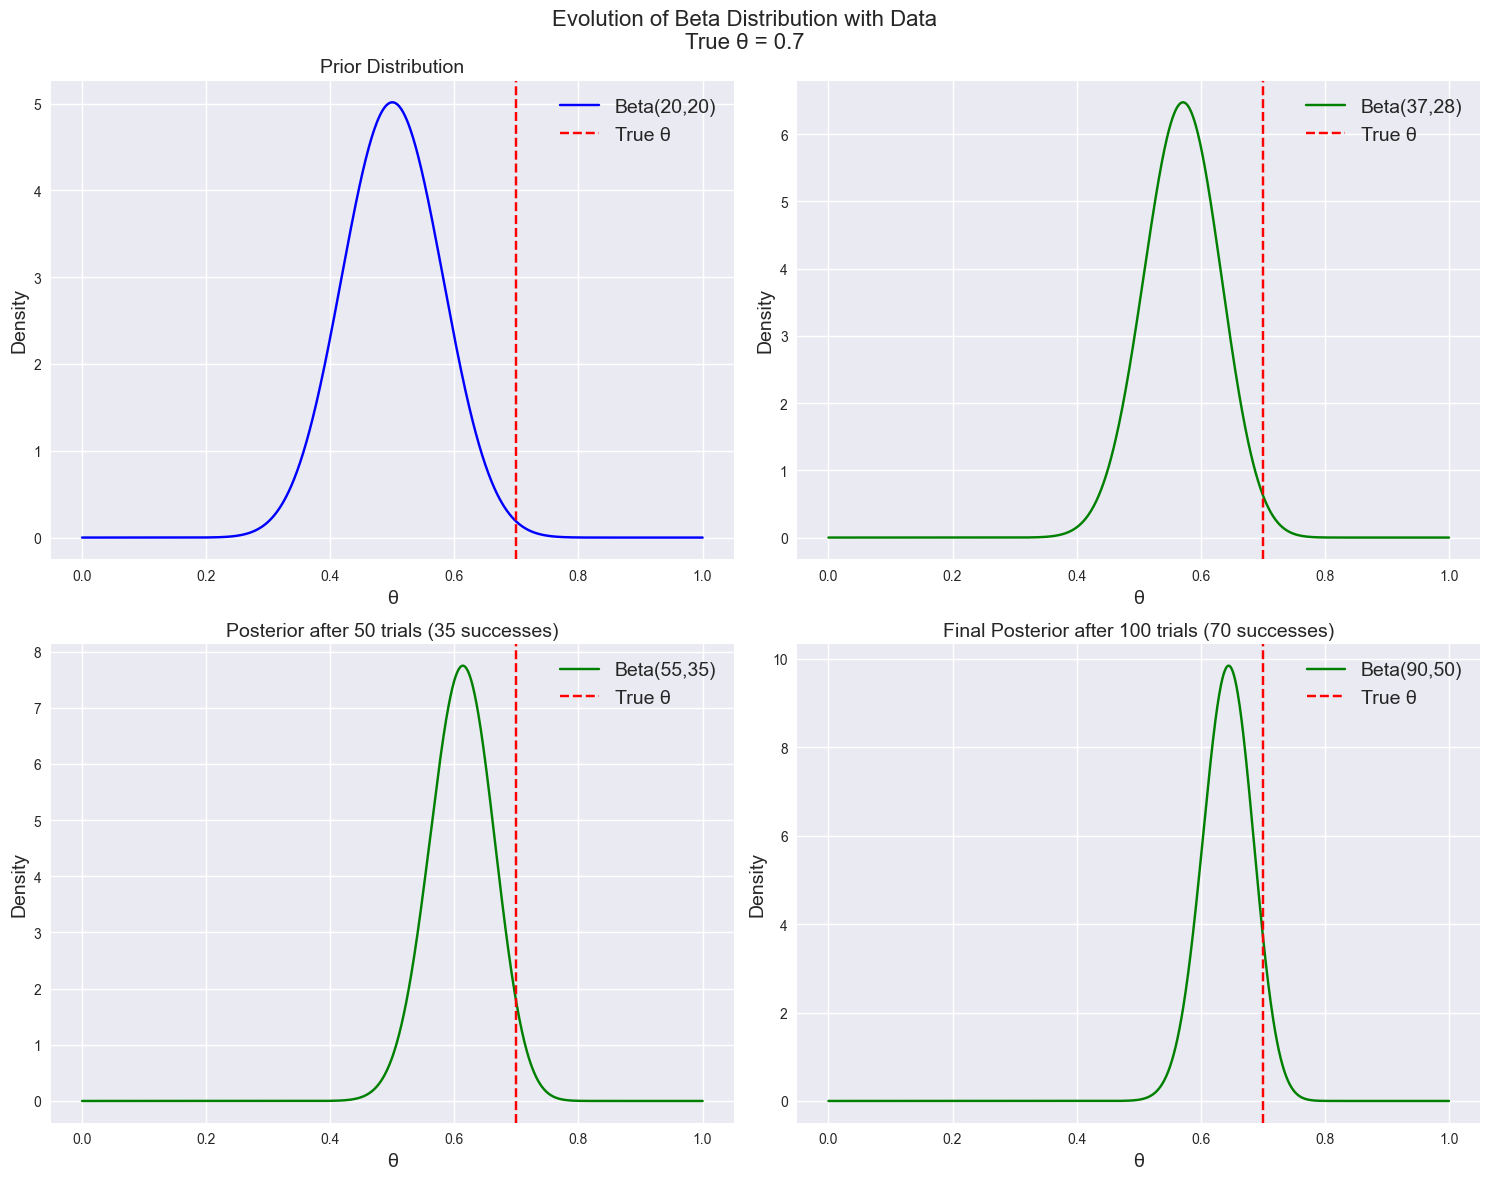

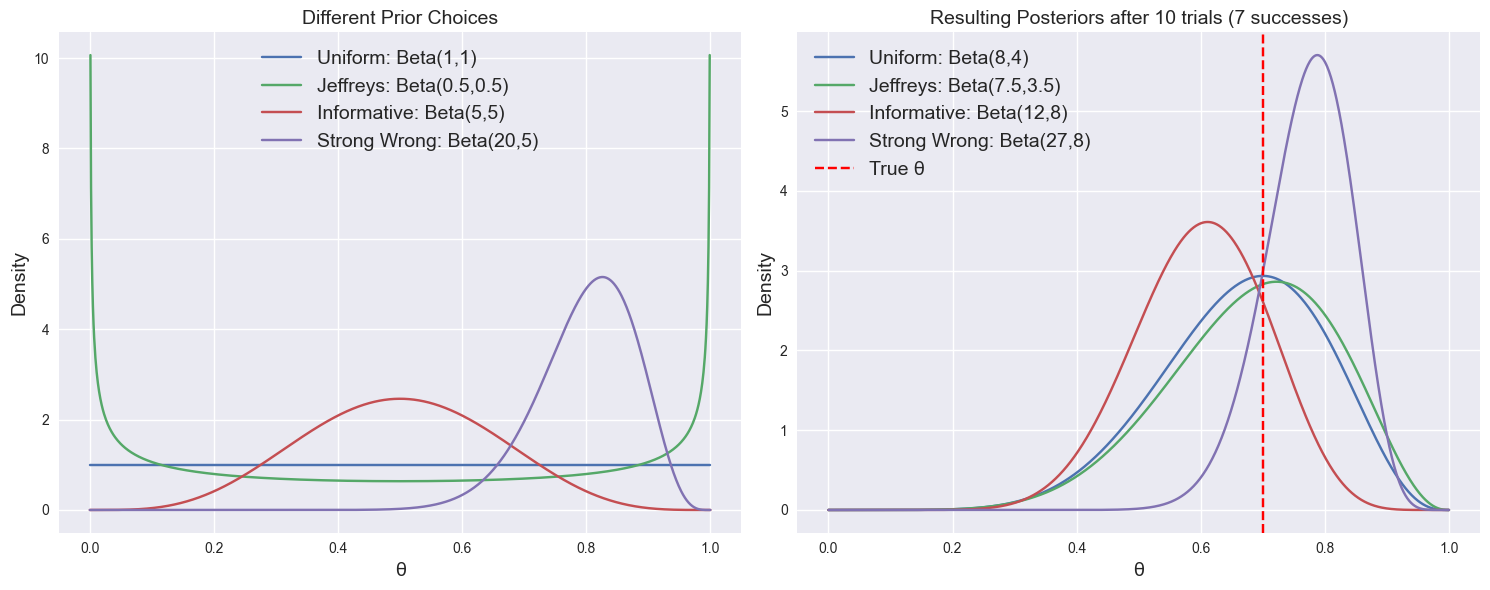

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import seaborn as sns

# Set the style for prettier plots
plt.style.use('seaborn-v0_8')

def plot_beta_evolution(prior_a, prior_b, data_successes, data_trials, theta_true=0.7):
    """
    Visualize how the Beta distribution evolves as we observe data from a Bernoulli process
    
    Parameters:
    -----------
    prior_a, prior_b : float
        Parameters of the prior Beta distribution
    data_successes : int 
        Number of successes observed
    data_trials : int
        Total number of trials
    theta_true : float
        True probability of success (for reference)
    """
    
    # Create theta values for plotting
    theta = np.linspace(0, 1, 1000)
    
    # Create figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Evolution of Beta Distribution with Data\nTrue θ = {theta_true}', fontsize=16)
    
    # Plot 1: Prior
    ax = axes[0,0]
    prior = beta.pdf(theta, prior_a, prior_b)
    ax.plot(theta, prior, 'b-', label=f'Beta({prior_a},{prior_b})')
    ax.axvline(theta_true, color='r', linestyle='--', label='True θ')
    ax.set_title('Prior Distribution',fontsize=14)
    ax.set_xlabel('θ',fontsize=14)
    ax.set_ylabel('Density',fontsize=14)
    ax.legend(fontsize=14)
    
    # Plot 2: After 25% of data
    ax = axes[0,1]
    n1 = data_trials // 4
    s1 = int(data_successes * n1/data_trials)
    post1 = beta.pdf(theta, prior_a + s1, prior_b + n1 - s1)
    ax.plot(theta, post1, 'g-', label=f'Beta({prior_a + s1},{prior_b + n1 - s1})')
    ax.axvline(theta_true, color='r', linestyle='--', label='True θ')
    ax.set_xlabel('θ',fontsize=14)
    ax.set_ylabel('Density',fontsize=14)
    ax.legend(fontsize=14)
    
    # Plot 3: After 50% of data
    ax = axes[1,0]
    n2 = data_trials // 2
    s2 = int(data_successes * n2/data_trials)
    post2 = beta.pdf(theta, prior_a + s2, prior_b + n2 - s2)
    ax.plot(theta, post2, 'g-', label=f'Beta({prior_a + s2},{prior_b + n2 - s2})')
    ax.axvline(theta_true, color='r', linestyle='--', label='True θ')
    ax.set_title(f'Posterior after {n2} trials ({s2} successes)',fontsize=14)
    ax.set_xlabel('θ',fontsize=14)
    ax.set_ylabel('Density',fontsize=14)
    ax.legend(fontsize=14)
    
    # Plot 4: After all data
    ax = axes[1,1]
    post_final = beta.pdf(theta, prior_a + data_successes, prior_b + data_trials - data_successes)
    ax.plot(theta, post_final, 'g-', 
           label=f'Beta({prior_a + data_successes},{prior_b + data_trials - data_successes})')
    ax.axvline(theta_true, color='r', linestyle='--', label='True θ')
    ax.set_title(f'Final Posterior after {data_trials} trials ({data_successes} successes)',fontsize=14)
    ax.set_xlabel('θ',fontsize=14)
    ax.set_ylabel('Density',fontsize=14)
    ax.legend(fontsize=14)
    
    plt.tight_layout()
    return fig

# Example 1: Weak Prior, Lot of Data
plt.figure(figsize=(15, 6))
fig1 = plot_beta_evolution(prior_a=2, prior_b=2, data_successes=70, data_trials=100, theta_true=0.7)

# Example 2: Strong Prior, Same Amount of Data
plt.figure(figsize=(15, 6))
fig2 = plot_beta_evolution(prior_a=20, prior_b=20, data_successes=70, data_trials=100, theta_true=0.7)

plt.show()

# Let's also create a function to compare different priors
def compare_priors(theta_true=0.7, data_successes=7, data_trials=10):
    """Compare different prior choices and their impact on the posterior"""
    
    theta = np.linspace(0, 1, 1000)
    
    # Different prior choices
    priors = {
        'Uniform': (1, 1),
        'Jeffreys': (0.5, 0.5),
        'Informative': (5, 5),
        'Strong Wrong': (20, 5)
    }
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot priors
    for name, (a, b) in priors.items():
        prior = beta.pdf(theta, a, b)
        ax1.plot(theta, prior, label=f'{name}: Beta({a},{b})')
    
    ax1.set_title('Different Prior Choices',fontsize=14)
    ax1.set_xlabel('θ',fontsize=14)
    ax1.set_ylabel('Density',fontsize=14)
    ax1.legend(fontsize=14)
    
    # Plot posteriors
    for name, (a, b) in priors.items():
        post = beta.pdf(theta, a + data_successes, b + data_trials - data_successes)
        ax2.plot(theta, post, 
                label=f'{name}: Beta({a + data_successes},{b + data_trials - data_successes})')
    
    ax2.axvline(theta_true, color='r', linestyle='--', label='True θ')
    ax2.set_title(f'Resulting Posteriors after {data_trials} trials ({data_successes} successes)',fontsize=14)
    ax2.set_xlabel('θ',fontsize=14)
    ax2.set_ylabel('Density',fontsize=14)
    ax2.legend(fontsize=14)
    
    plt.tight_layout()
    return fig

# Create comparison plot
fig3 = compare_priors()
plt.show()


The Gamma distribution excellently models positive-valued quantities like:

- Daily trading volumes
- Time between trades
- Price changes
- Volatility

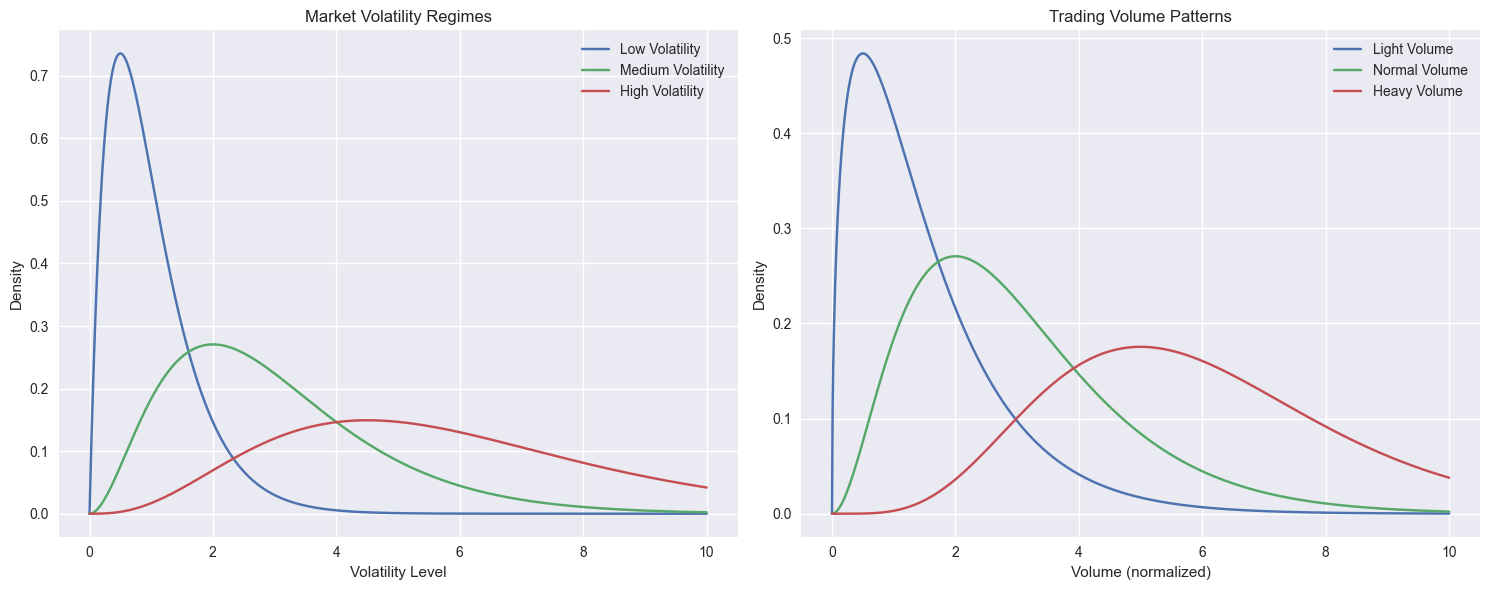

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

def plot_financial_examples():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Generate x values
    x = np.linspace(0, 10, 1000)
    
    # Plot 1: Different volatility regimes
    low_vol = gamma.pdf(x, a=2, scale=0.5)  # More concentrated
    med_vol = gamma.pdf(x, a=3, scale=1.0)  # Medium spread
    high_vol = gamma.pdf(x, a=4, scale=1.5)  # More spread out
    
    ax1.plot(x, low_vol, label='Low Volatility')
    ax1.plot(x, med_vol, label='Medium Volatility')
    ax1.plot(x, high_vol, label='High Volatility')
    ax1.set_title('Market Volatility Regimes')
    ax1.set_xlabel('Volatility Level')
    ax1.set_ylabel('Density')
    ax1.legend()
    
    # Plot 2: Trading volume patterns
    light = gamma.pdf(x, a=1.5, scale=1)    # Light trading
    normal = gamma.pdf(x, a=3, scale=1)     # Normal trading
    heavy = gamma.pdf(x, a=6, scale=1)      # Heavy trading
    
    ax2.plot(x, light, label='Light Volume')
    ax2.plot(x, normal, label='Normal Volume')
    ax2.plot(x, heavy, label='Heavy Volume')
    ax2.set_title('Trading Volume Patterns')
    ax2.set_xlabel('Volume (normalized)')
    ax2.set_ylabel('Density')
    ax2.legend()
    
    plt.tight_layout()
    return fig

plot_financial_examples()
plt.show()

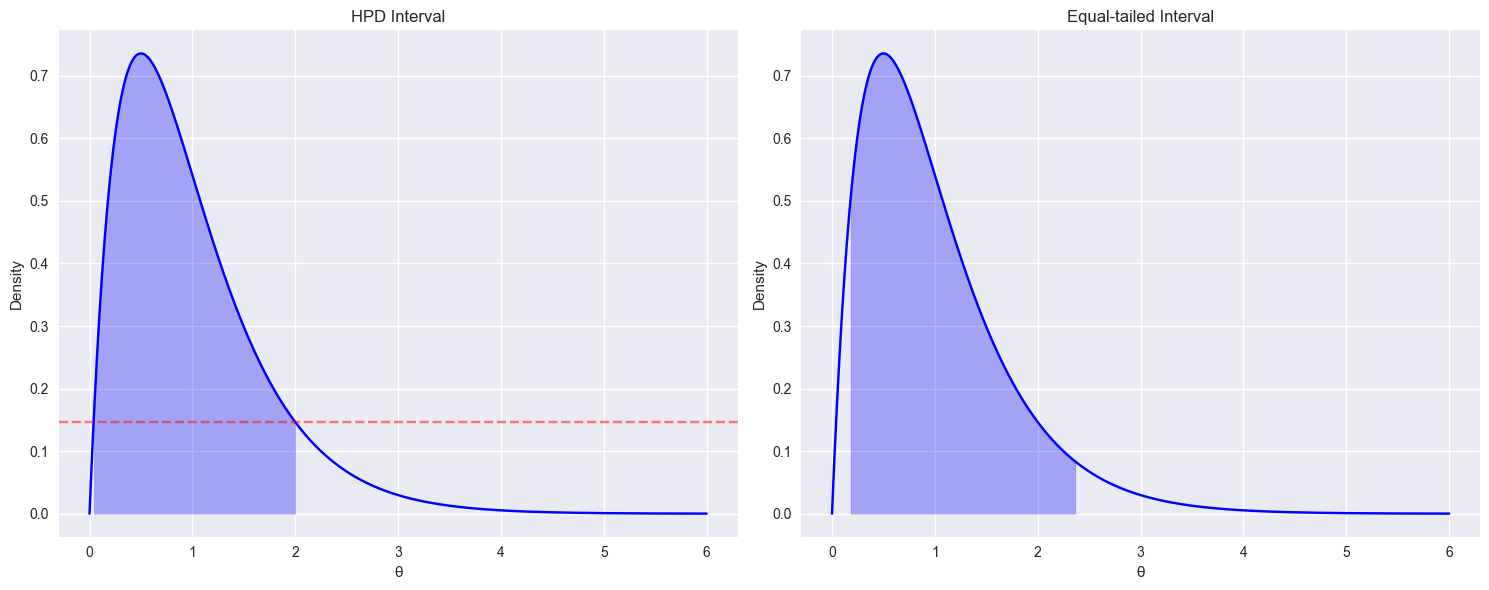

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.optimize import fsolve

def plot_hpd_vs_equal_tailed():
    # Set up the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Generate x values
    x = np.linspace(0, 6, 1000)
    
    # Generate Gamma(2,2) pdf
    gamma_pdf = gamma.pdf(x, a=2, scale=1/2)
    
    # Plot HPD interval
    ax1.plot(x, gamma_pdf, 'b-', label='Gamma(2,2)')
    
    # Find HPD interval (simplified approach)
    # In practice, you'd use numerical methods
    hpd_region = (0.04, 2.0)
    hpd_height = gamma.pdf(2.0, a=2, scale=1/2)
    
    # Shade HPD region
    ax1.fill_between(x[(x >= hpd_region[0]) & (x <= hpd_region[1])],
                     gamma_pdf[(x >= hpd_region[0]) & (x <= hpd_region[1])],
                     alpha=0.3, color='blue')
    ax1.axhline(y=hpd_height, color='r', linestyle='--', alpha=0.5)
    
    ax1.set_title('HPD Interval')
    ax1.set_xlabel('θ')
    ax1.set_ylabel('Density')
    
    # Plot equal-tailed interval
    ax2.plot(x, gamma_pdf, 'b-', label='Gamma(2,2)')
    
    # Find equal-tailed interval
    equal_tailed = gamma.ppf([0.05, 0.95], a=2, scale=1/2)
    
    # Shade equal-tailed region
    ax2.fill_between(x[(x >= equal_tailed[0]) & (x <= equal_tailed[1])],
                     gamma_pdf[(x >= equal_tailed[0]) & (x <= equal_tailed[1])],
                     alpha=0.3, color='blue')
    
    ax2.set_title('Equal-tailed Interval')
    ax2.set_xlabel('θ')
    ax2.set_ylabel('Density')
    
    plt.tight_layout()
    return fig

plot_hpd_vs_equal_tailed()
plt.show()